
  There is a binary version available but the source version is later:
          binary source needs_compilation
segmented  1.3-4  1.5-0             FALSE



installing the source package 'segmented'




	***Regression Model with Segmented Relationship(s)***

Call: 
segmented.lm(obj = boltzmann_linear, seg.Z = ~x1)

Estimated Break-Point(s):
           Est. St.Err
psi1.x1 37.045  0.681

Meaningful coefficients of the linear terms:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -25.8069     5.1351  -5.026 8.02e-07 ***
x1            0.4166     0.1468   2.838   0.0048 ** 
U1.x1        -0.5724     0.1844  -3.104       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.747 on 350 degrees of freedom
Multiple R-Squared: 0.05927,  Adjusted R-squared: 0.05121 

Boot restarting based on 6 samples. Last fit:
Convergence attained in 2 iterations (rel. change 6.6394e-09)

[1] 37.04535

[1] 40.0048

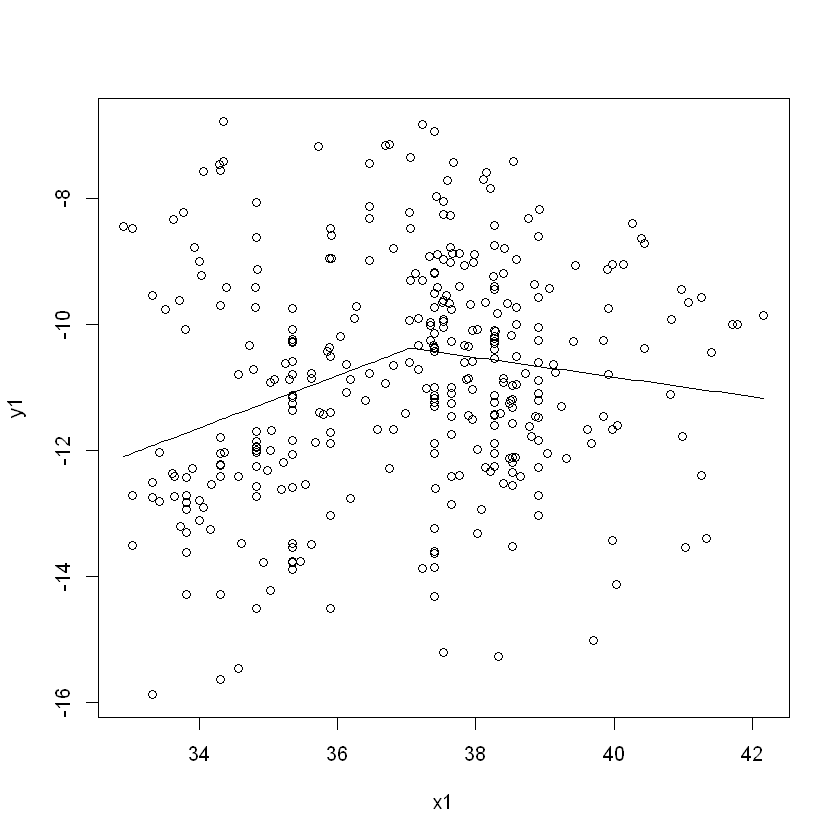

In [17]:
# Clear the data
rm(list=ls())

#Import the merged data
Data <- read.csv("C:/Users/FAN/Desktop/Data/Merged_data.csv", as.is=TRUE)

#unit from Celsius to K
Data$OptimumTemp<-Data$Optimum.Temp+273.15
Data$TempUnit[Data$TempUnit%in%c("Celsius")]<-"K"

#Divide into Bacteria, Archaea and Phytoplankton
bacteria_d <- Data[Data$Superkingdom == "Bacteria",]
archaea_d<-Data[Data$Superkingdom == "Archaea",]
phyto_d<-Data[Data$Superkingdom == "Phytoplankton",]

# Using "segmented" R package to find analysis break-points in the data
install.packages("segmented")
library(segmented)

#Boltzmann constant 
k <- 8.62e-5 
x1 = 1 / (k*(bacteria_d$OptimumTemp))
y1 = log(bacteria_d$GrowthRate)
boltzmann_linear <- lm(y1 ~ x1)
os1 <- segmented(boltzmann_linear, seg.Z =~ x1) 
plot(x1,y1)
plot(os1, add=T)
summary.segmented(os1)
os1$psi[2]
bacteria_breakpoint_celsius <- (1/(k*os1$psi[2]))-273.15
bacteria_breakpoint_celsius



	***Regression Model with Segmented Relationship(s)***

Call: 
segmented.lm(obj = boltzmann_linear, seg.Z = ~x2)

Estimated Break-Point(s):
           Est. St.Err
psi1.x2 32.327  0.422

Meaningful coefficients of the linear terms:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   59.369     37.037   1.603   0.1110  
x2            -2.209      1.165  -1.896   0.0599 .
U1.x2          2.231      1.168   1.911       NA  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.718 on 151 degrees of freedom
Multiple R-Squared: 0.04395,  Adjusted R-squared: 0.02495 

Boot restarting based on 6 samples. Last fit:
Convergence attained in 3 iterations (rel. change 0)

[1] 32.3268

[1] 85.71405

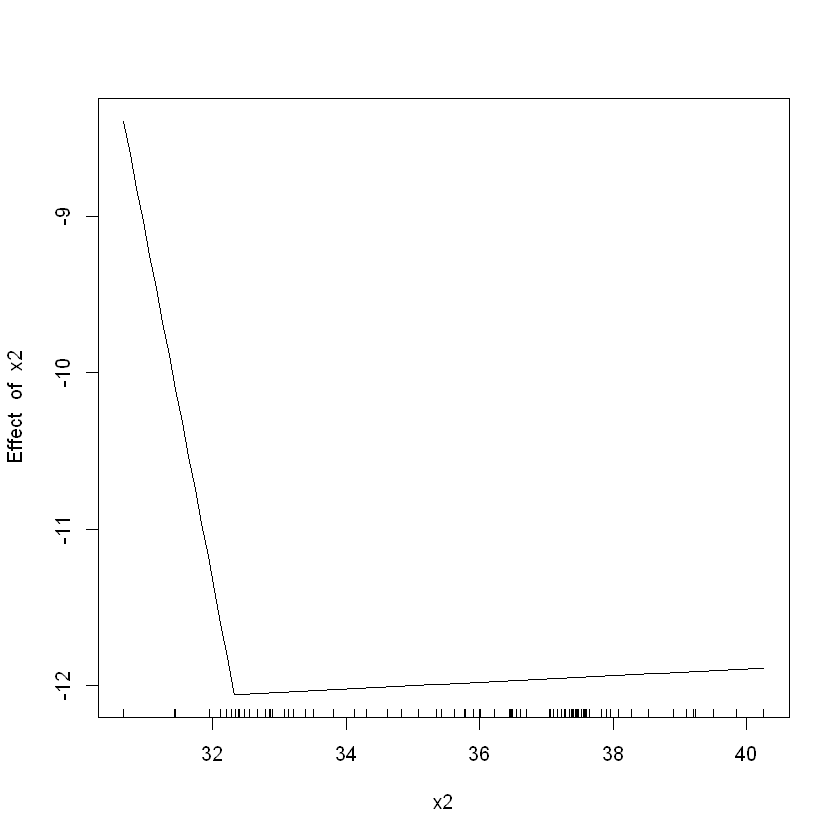

In [11]:
# repeat for archaea
x2 = 1 / (k*(archaea_d$OptimumTemp))
y2 = log(archaea_d$GrowthRate)

boltzmann_linear <- lm(y2 ~ x2)

os2 <- segmented(boltzmann_linear, seg.Z =~ x2)
plot.segmented(os2)
summary.segmented(os2)

os2$psi[2] # <-- this is the break point

archaea_breakpoint_celsius <- (1/(k*os2$psi[2]))-273.15
archaea_breakpoint_celsius


	***Regression Model with Segmented Relationship(s)***

Call: 
segmented.lm(obj = boltzmann_linear, seg.Z = ~x3)

Estimated Break-Point(s):
           Est. St.Err
psi1.x3 41.723  0.036

Meaningful coefficients of the linear terms:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8.1889     5.7649   1.420 0.158173    
x3           -0.5111     0.1471  -3.474 0.000724 ***
U1.x3        29.3221     3.3182   8.837       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.37 on 115 degrees of freedom
Multiple R-Squared: 0.6105,  Adjusted R-squared: 0.6003 

Boot restarting based on 6 samples. Last fit:
Convergence attained in 7 iterations (rel. change 0)

[1] 41.7225

[1] 4.899675

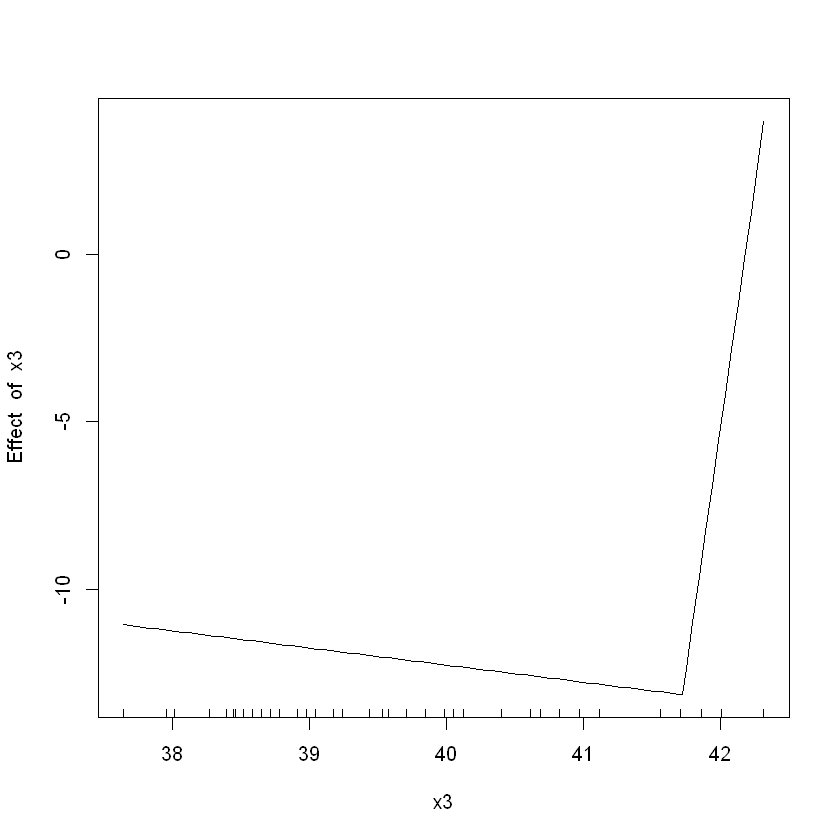

In [12]:
#repeat for phytoplankton
x3 = 1 / (k*(phyto_d$OptimumTemp))
y3 = log(phyto_d$GrowthRate)

boltzmann_linear <- lm(y3 ~ x3)

os3 <- segmented(boltzmann_linear, seg.Z =~ x3)
plot.segmented(os3)
summary.segmented(os3)

os3$psi[2] # <-- this is the break point

archaea_breakpoint_celsius <- (1/(k*os3$psi[2]))-273.15
archaea_breakpoint_celsius

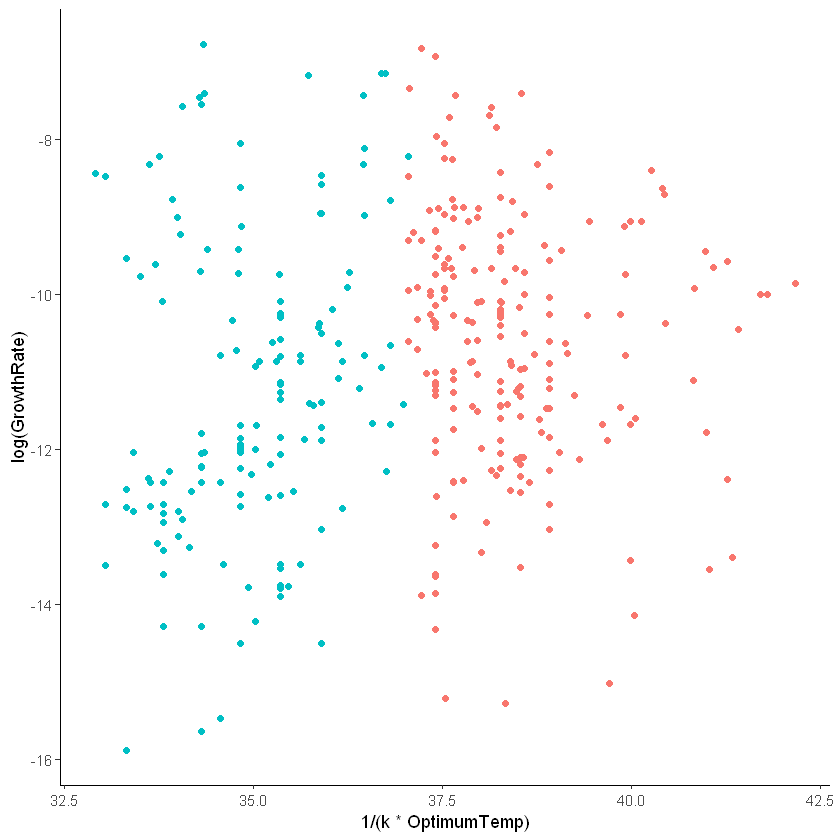

In [16]:
#classify prokaryotes into Thermo and Meso
Data$TempPref <- NA
for (i in 1:length(Data$OptimumTemp)){
  if (!is.na(Data$OptimumTemp[i])){
    if (Data$Superkingdom[i] == "Bacteria"){
      if (Data$OptimumTemp[i] > 313.15){ #40C
        Data$TempPref[i] <- "Thermophile"
      }
      else{
        Data$TempPref[i] <- "Mesophile"
      }
    }
    else if (Data$Superkingdom[i] == "Archaea"){
      if (Data$OptimumTemp[i] >358.86){ #85.71c
        Data$TempPref[i] <- "Thermophile"
      }
      else{
        Data$TempPref[i] <- "Mesophile"
      }
    }
    else{
      Data$TempPref[i] <- "NA"
    }
  }
  if (Data$Superkingdom[i] == "Phytoplankton"){
    if (Data$OptimumTemp[i] > 278.05){ #4.9C
      Data$TempPref[i] <- "Thermophile"
    }
    else{
      Data$TempPref[i] <- "Mesophile"}
    }
  }

bacteria_d <- Data[Data$Superkingdom == "Bacteria",]
archaea_d<-Data[Data$Superkingdom == "Archaea",]
phyto_d<-Data[Data$Superkingdom == "Phytoplankton",]

a<-ggplot(bacteria_d, aes(x =1/(k*OptimumTemp), y = log(GrowthRate), col = TempPref)) +
  geom_point()+
  theme_classic()+
  theme(legend.position = "none")
a


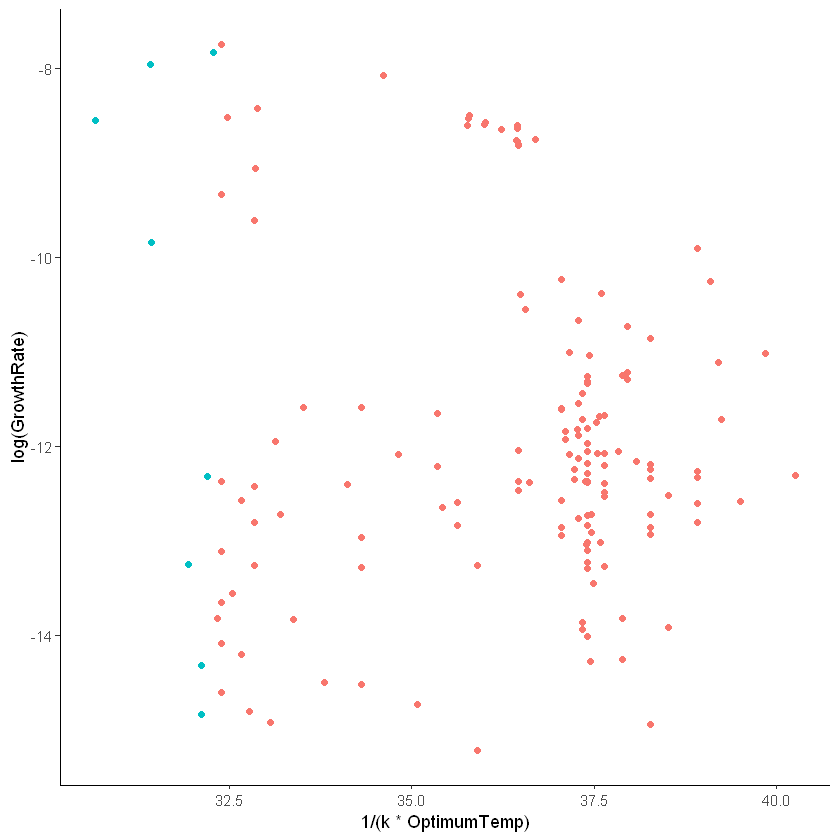

In [14]:
b<-ggplot(archaea_d, aes(x =1/(k*OptimumTemp), y = log(GrowthRate), col = TempPref)) +
  geom_point()+
  theme_classic()+
  theme(legend.position = "none")
b


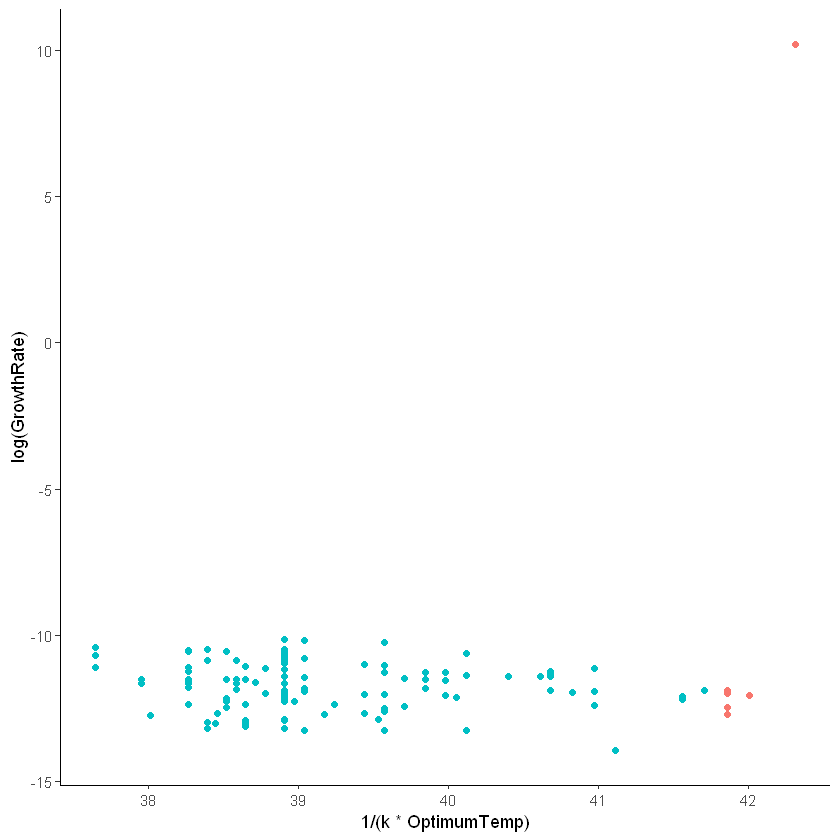

In [15]:
c<-ggplot(phyto_d, aes(x =1/(k*OptimumTemp), y = log(GrowthRate), col = TempPref)) +
  geom_point()+
 theme_classic()+
  theme(legend.position = "none")
c